In [42]:
# Imports
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=10, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)
X

array([[ 1.00507879,  4.59464203],
       [ 1.12847762,  4.32812233],
       [ 2.11788106,  0.72684451],
       [ 0.95562631,  4.38590703],
       [-1.35401677,  2.76944926],
       [-1.07295309,  2.62700913],
       [-2.03750198,  3.04860598],
       [ 2.35408334,  0.85663201],
       [ 2.14404017,  0.96439853],
       [ 1.16628776,  4.27351589]])

In [3]:
# Convert the data points into a pandas DataFrame
import pandas as pd

# Generate indicators for the data points
obj_names = []
for i in range(1, 11):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0],
    'Y_value': X[:, -1]
})

# Preview the data
data

,Object,X_value,Y_value
0,Object 1,1.005079,4.594642
1,Object 2,1.128478,4.328122
2,Object 3,2.117881,0.726845
3,Object 4,0.955626,4.385907
4,Object 5,-1.354017,2.769449
5,Object 6,-1.072953,2.627009
6,Object 7,-2.037502,3.048606
7,Object 8,2.354083,0.856632
8,Object 9,2.144040,0.964399
9,Object 10,1.166288,4.273516


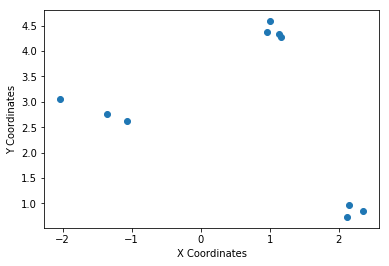

In [4]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

In [45]:
# Initialize the centroids
c1 = (-1, 4)
c2 = (-0.2, 1.5)
c3 = (2, 2.5)

In [9]:
# A helper function to calculate the Euclidean diatance between the data points and the centroids
import numpy as np

def calculate_distance(centroid, X, Y):
    distances = []
    
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
    
    # Iterate over the data points and calculate the distance using the given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
    
    return distances

In [12]:
# Calculate the distance and assign them to the DataFrame accordingly
data['C1_Distance'] = calculate_distance(c1, data.X_value, data.Y_value)
data['C2_Distance'] = calculate_distance(c2, data.X_value, data.Y_value)
data['C3_Distance'] = calculate_distance(c3, data.X_value, data.Y_value)

# Preview the data
data

,Object,X_value,Y_value,C1_Distance,C2_Distance,C3_Distance
0,Object 1,1.005079,4.594642,2.091397,3.320997,2.318921
1,Object 2,1.128478,4.328122,2.153620,3.124601,2.025236
2,Object 3,2.117881,0.726845,4.520479,2.443428,1.777070
3,Object 4,0.955626,4.385907,1.993339,3.108686,2.155774
4,Object 5,-1.354017,2.769449,1.280462,1.715592,3.364823
5,Object 6,-1.072953,2.627009,1.374928,1.425551,3.075577
6,Object 7,-2.037502,3.048606,1.407679,2.403038,4.074603
7,Object 8,2.354083,0.856632,4.596807,2.633869,1.681081
8,Object 9,2.144040,0.964399,4.370339,2.404453,1.542342
9,Object 10,1.166288,4.273516,2.183487,3.091785,1.959703


In [14]:
# Get the minimum distance centroids
data['Cluster'] = data[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis =1)

# Map the centroids accordingly and rename them
data['Cluster'] = data['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2', 'C3_Distance': 'C3'})

# Get a preview of the data
data

,Object,X_value,Y_value,C1_Distance,C2_Distance,C3_Distance,Cluster
0,Object 1,1.005079,4.594642,2.091397,3.320997,2.318921,C1
1,Object 2,1.128478,4.328122,2.153620,3.124601,2.025236,C3
2,Object 3,2.117881,0.726845,4.520479,2.443428,1.777070,C3
3,Object 4,0.955626,4.385907,1.993339,3.108686,2.155774,C1
4,Object 5,-1.354017,2.769449,1.280462,1.715592,3.364823,C1
5,Object 6,-1.072953,2.627009,1.374928,1.425551,3.075577,C1
6,Object 7,-2.037502,3.048606,1.407679,2.403038,4.074603,C1
7,Object 8,2.354083,0.856632,4.596807,2.633869,1.681081,C3
8,Object 9,2.144040,0.964399,4.370339,2.404453,1.542342,C3
9,Object 10,1.166288,4.273516,2.183487,3.091785,1.959703,C3


In [16]:
# Get the number of data points in the clusters
from collections import Counter

label_counts = Counter(data['Cluster'].values)
label_counts.most_common()

[('C1', 5), ('C3', 5)]

In [18]:
# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = data[data['Cluster']=='C1']['X_value'].mean()
y_new_centroid1 = data[data['Cluster']=='C1']['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = data[data['Cluster']=='C3']['X_value'].mean()
y_new_centroid2 = data[data['Cluster']=='C3']['Y_value'].mean()

# Print the coordinates of the new centroids
print('Centroid 1 ({}, {})'.format(x_new_centroid1, y_new_centroid1))
print('Centroid 2 ({}, {})'.format(x_new_centroid2, y_new_centroid2))

Centroid 1 (-0.500753347459331, 3.4851226841526897)
Centroid 2 (1.7821539902873855, 2.2299026522421928)


In [21]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [23]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[-1.48815728,  2.81502145],
       [ 2.20533486,  0.84929168],
       [ 1.06386762,  4.39554682]])

In [24]:
# Get the cluster labels
kmeans.labels_

array([2, 2, 1, 2, 0, 0, 0, 1, 1, 2])

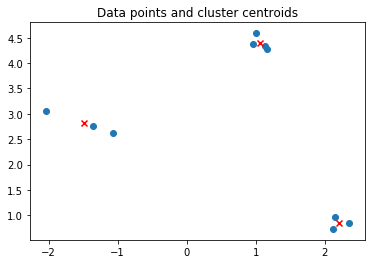

In [26]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [31]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.8810668519873335


In [32]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


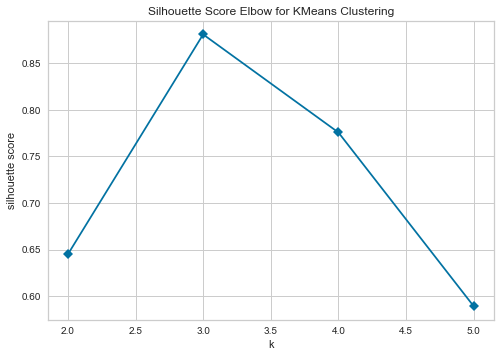

In [33]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()